# Data Exploration, Analysis and Visualization

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('../Data/default_of_credit_card_clients__courseware_version_1_21_19.xls')

Job in data exploration is to not only look through the data both directly and using numerical and graphical summaries, but also to think critically about whether the data make sense and match what you have been told about them. These are helpful steps in data exploration: 

### 1. How many columns are there in the data? 
These may be features, response, or metadata.

### 2. How many rows (samples)?

### 3. What kind of features are there? 
Which are categorical and which are numerical? Categorical features have values in discrete classes such as "Yes," "No," or "maybe."Numerical features are typically on a continuous numerical scale, such as dollar amounts.

### 4. What does the data look like in these features? 
To see this, you can examine the range of values in numeric features, or the frequency of different classes in categorical features, for example.

### 5. Is there any missing data?

In [5]:
# 1. No of columns 
df.shape[1]

25

In [6]:
# 2. No of samples or rows
df.shape[0]

30000

In [11]:
# 3. What does the data look like in these features
print(df.columns)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


In [12]:
# Data Types of Features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null object
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_1                         30000 non-null object
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6             

### 6. Cheque whether all  records are unique or not
if number of rows equal to df.nunique are same all records are unique else there are duplicate records

In [14]:
df.shape[0] == df['ID'].nunique()

False

- False indicates there are are duplicate rows

In [16]:
print("Total rows/records: ", df.shape[0])
print("No of uniq records: ", df['ID'].nunique())

No of rows:  30000
No of uniq records:  29687


### 7. Use the .value_counts() method on the ID series to find count of each unique IDs

In [21]:
id_counts = df['ID'].value_counts()
id_counts.head()

40e75290-0f59    2
d6697da8-74fc    2
97f74dea-338e    2
e8bcb1bb-456e    2
7574bf9e-f3f9    2
Name: ID, dtype: int64

- Find count of each individual counts that is how many times ids have 1 count, have 2 count, have 3 count, etc

### 8. Count Duplicate Records :: 313

In [22]:
id_counts.value_counts()

1    29374
2      313
Name: ID, dtype: int64

29374 ids occured once and 313 ids have occured twice. there is not a single id which occured thrice or more

### 9. Create Mask to remove duplicate records

In [28]:
dup_mask = id_counts == 2
dup_mask.head()

40e75290-0f59    True
d6697da8-74fc    True
97f74dea-338e    True
e8bcb1bb-456e    True
7574bf9e-f3f9    True
Name: ID, dtype: bool

### 10. Prepare a list of duplicate ids and count duplicate Ids

In [33]:
dup_ids = id_counts.index[dup_mask]
print("1st five dup Ids: \n", dup_ids[:5])

print("\nNo of Duplicate Ids: ", len(list(dup_ids)))

1st five dup Ids: 
 Index(['40e75290-0f59', 'd6697da8-74fc', '97f74dea-338e', 'e8bcb1bb-456e',
       '7574bf9e-f3f9'],
      dtype='object')

No of Duplicate Ids:  313


In [48]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [70]:
dup_ids[:5]

Index(['40e75290-0f59', 'd6697da8-74fc', '97f74dea-338e', 'e8bcb1bb-456e',
       '7574bf9e-f3f9'],
      dtype='object')

In [99]:
list(dup_ids[:5])

['40e75290-0f59',
 'd6697da8-74fc',
 '97f74dea-338e',
 'e8bcb1bb-456e',
 '7574bf9e-f3f9']

In [100]:
# mask_dup1 = df['ID'].isin(dup_ids)
mask_dup1 = dup_ids.isin(df['ID'])
mask_dup1[:5]

array([ True,  True,  True,  True,  True])

In [37]:
# loc is used to get set of rows and columns 
# either using index or index-key  with column headings
# yelp_df.loc[100, 'city'] // Row 101 and column city
# print(df.loc['Ronaldo']) 
# print(df.loc[['Ronaldo', 'George Best'], 'shoe_size']) // Specific row with shoe size column
# print(df.loc['Ronaldo':'George Best', 'shoe_size']) // Range of row with shoe size column
# print(df.iloc[0:4, 3:6]) // iloc uses index of rows and columns starting from 0 idx

### 11. Find out zeros in individual columns and rows with all zeros 

In [101]:
df_zero_mask = df == 0
df_zero_mask.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,True,True,True,True,False
1,False,False,False,False,False,False,False,False,True,True,...,False,False,False,True,False,False,False,True,False,False
2,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True


In [111]:
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)
print("1st five rows having zeros in all columns", feature_zero_mask[:5])

print("\nTotal Records with zeros in all columns: ", feature_zero_mask.sum())

1st five rows having zeros in all columns 0    False
1    False
2    False
3    False
4    False
dtype: bool

Total Records with zeros in all columns:  315


### 12. Copy all those rows having not a single zero values i.e. remove duplicate rows or missing value row

In [118]:
df_clean_1 = df.loc[~feature_zero_mask,:].copy()
print("df_clean_1.shape[0]: ",df_clean_1.shape[0])
print('\n') # Check for unique records in filtered data
print("df_clean_1['ID'].nunique():",df_clean_1['ID'].nunique(),"\n") #row count is same in both case, No duplicates
df_clean_1.head()

df_clean_1.shape[0]:  29685


df_clean_1['ID'].nunique(): 29685 



,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### 13. Examine values of features and Eliminate records with missing values

In [119]:
df_clean_1['PAY_1'].head(5)

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

In [120]:
df_clean_1['PAY_1'].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

There is a 'Not available' string present in this column, symbolizing missing data

In [122]:
# Mask for Rows without "'Not available'" 
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'
valid_pay_1_mask[:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [129]:
# Missing value recod count: 3021 from df_clean_1.value_counts()
print("With missing value:",df_clean_1.shape[0], "W/o missing value:", valid_pay_1_mask.sum(),"+ 3021=", valid_pay_1_mask.sum()+3021)

With missing value: 29685 W/o missing value: 26664 + 3021= 29685


In [132]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()
df_clean_2.shape

(26664, 25)

In [133]:
df_clean_2['PAY_1'].value_counts()

 0    13087
-1     5047
 1     3261
-2     2476
 2     2378
 3      292
 4       63
 5       23
 8       17
 6       11
 7        9
Name: PAY_1, dtype: int64

In [136]:
# Type Casting
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')
df_clean_2[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 25 columns):
ID                            26664 non-null object
LIMIT_BAL                     26664 non-null int64
SEX                           26664 non-null int64
EDUCATION                     26664 non-null int64
MARRIAGE                      26664 non-null int64
AGE                           26664 non-null int64
PAY_1                         26664 non-null int64
PAY_2                         26664 non-null int64
PAY_3                         26664 non-null int64
PAY_4                         26664 non-null int64
PAY_5                         26664 non-null int64
PAY_6                         26664 non-null int64
BILL_AMT1                     26664 non-null int64
BILL_AMT2                     26664 non-null int64
BILL_AMT3                     26664 non-null int64
BILL_AMT4                     26664 non-null int64
BILL_AMT5                     26664 non-null int64
BILL_AMT6              

### 14. Sumarise data of specific columns

In [137]:
df_clean_2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


LIMIT_BAL, the credit limit, seems to make sense.

The AGE feature also looks reasonably distributed, with no one under the age of 21 having a credit account.

In [141]:
import matplotlib.pyplot as plt #import plotting package

#render plotting automatically
%matplotlib inline

import matplotlib as mpl #additional plotting functionality

mpl.rcParams['figure.dpi'] = 200 #high resolution figures

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5febd6ad90>,
      dtype=object)

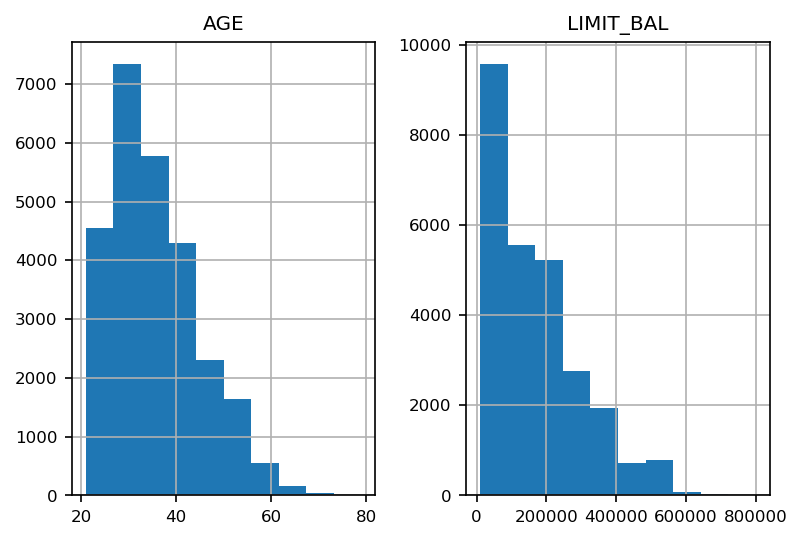

In [178]:
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['font.size'] = 8
df_clean_2[['LIMIT_BAL', 'AGE']].hist()

### 15. Handling Categorical Features

For the categorical features, a look at the value counts is useful, since there are relatively few unique values. Obtain the value counts for the EDUCATION feature

In [143]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

Here, we see undocumented education levels 0, 5, and 6, as the data dictionary describes only "Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)". Our business partner tells us they don't know about the others. Since they are not very prevalent, we will lump them in with the "others" category, which seems appropriate, with our client's blessing, of course.

In [144]:
df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6], value = 4, inplace = True)
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

In [145]:
df_clean_2['EDUCATION'].head()

0    2
1    2
2    2
3    2
4    2
Name: EDUCATION, dtype: int64

From the data dictionary, we know that 1 = graduate school, 2 = university, 3 = high school, 4 = others. We would like to recreate a column that has these strings, instead of numbers

In [147]:
cat_mapping = {
    1: "graduate school",
    2: "university",
    3: "high school",
    4: "others"
}

In [148]:
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)

In [149]:
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [152]:
df_clean_2.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,university
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,university
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,university


create a one-hot encoded DataFrame of the EDUCATION_CAT column. Examine the first 10 rows:

In [153]:
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(10)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


Concatenate the one-hot encoded DataFrame to the original DataFrame as follows:

In [154]:
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)
df_with_ohe[['EDUCATION_CAT', 'graduate school',
             'high school', 'university', 'others']].head(10)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0


In [155]:
df_with_ohe.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1


In [156]:
## Save to CSV  file
df_with_ohe.to_csv('../Data/Chapter_1_cleaned_data.csv', index=False)

### 16. Deep Dive into Numerical Features and Visualization

In [157]:
### Load saved CSV  file
df = pd.read_csv('../Data/Chapter_1_cleaned_data.csv')

In [158]:
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
pay_feats

['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [159]:
df[pay_feats[0]].value_counts().sort_index()

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

In [160]:
pay_feats[0]

'PAY_1'

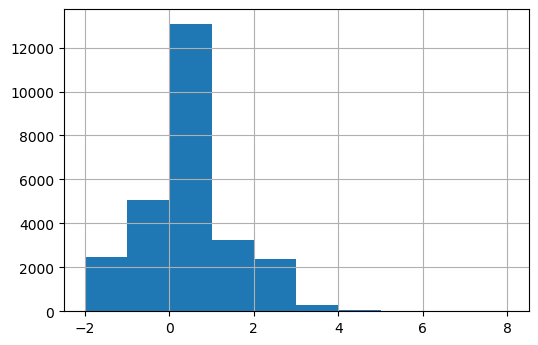

In [173]:
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['font.size'] = 10
df[pay_feats[0]].hist()

In [166]:
import numpy as np
pay_1_bins = np.array(range(-2,10)) - 0.5
pay_1_bins

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

Text(0, 0.5, 'Number of accounts')

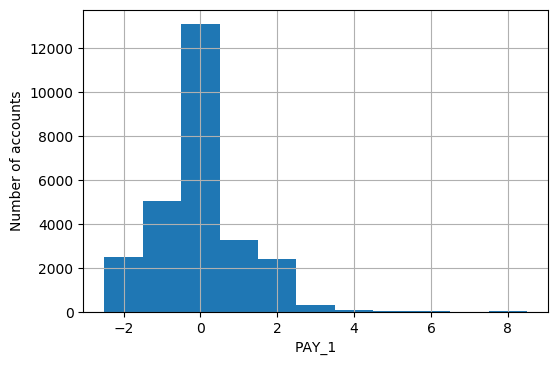

In [174]:
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['font.size'] = 10
df[pay_feats[0]].hist(bins=pay_1_bins)
plt.xlabel('PAY_1')
plt.ylabel('Number of accounts')

Since we already looked at the value counts, this confirms for us that most accounts are in good standing (values -2, -1, and 0). For those that aren't, it's more common for the "months late" to be a smaller number. This makes sense; likely, most people are paying off their balances before too long. Otherwise, their account may be closed or sold to a collection agency

Multiple graphs together. The plot titles have been created automatically for us based on the column names. The y axes are understood to be counts. The resulting visualizations are as follows:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ff324a610>,
      dtype=object)

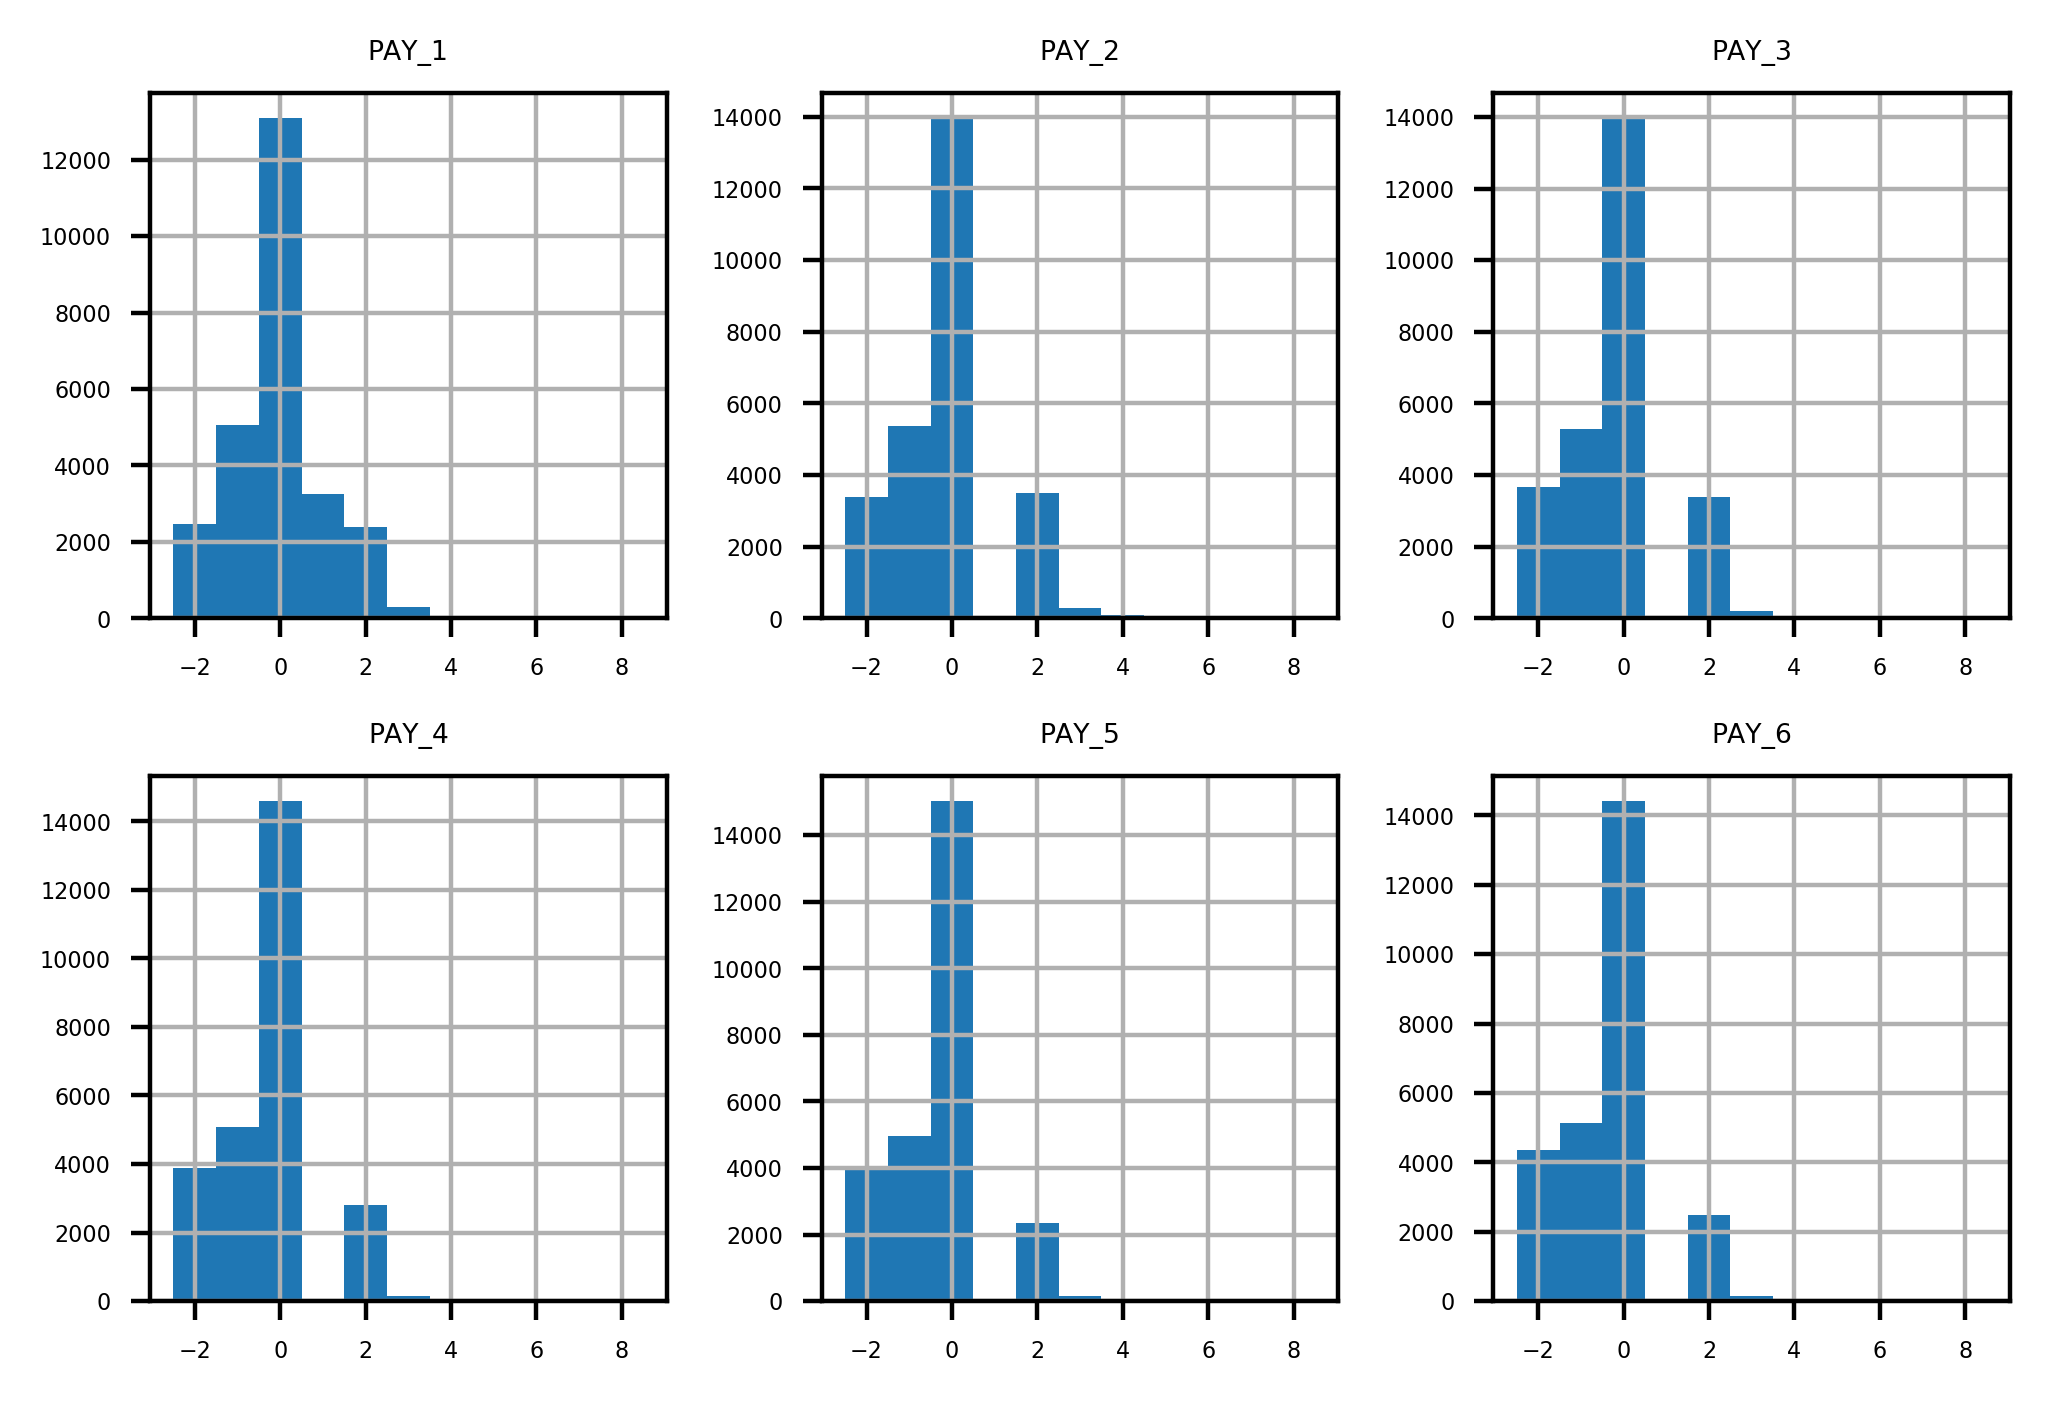

In [168]:
mpl.rcParams['font.size'] = 4
df[pay_feats].hist(bins=pay_1_bins, layout=(2,3))

For example, PAY_2 is the repayment status in August, PAY_3 is the repayment status in July, and the others go further back in time. A value of 1 means payment delay for 1 month, while a value of 2 means payment delay for 2 months, and so forth.

Did you notice that something doesn't seem right? Consider the values between July (PAY_3) and August (PAY_2). In July, there are very few accounts that had a 1-month payment delay; this bar is not really visible in the histogram. However, in August, there are suddenly thousands of accounts with a 2-month payment delay. This does not make sense: the number of accounts with a 2-month delay in a given month should be less than or equal to the number of accounts with a 1-month delay in the previous month.

In [179]:
bill_feats = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_amt_feats = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [180]:
df[bill_feats].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


Plot a histogram of the bill payment features similar to the bill amount features, but also apply some rotation to the x-axis labels with the xrot keyword argument so that they don't overlap. In any plotting function, you can include the xrot=[angle] keyword argument to rotate x-axis labels by a given angle in degrees. Consider the results.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5febbf7ad0>,
      dtype=object)

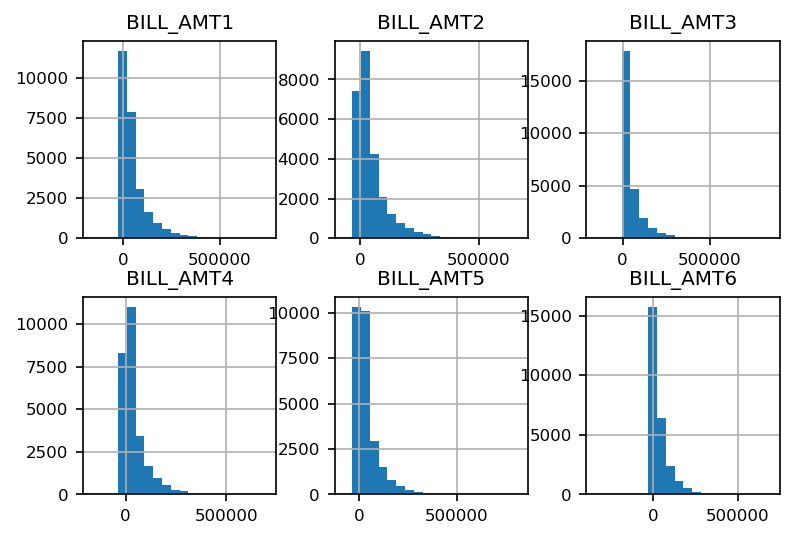

In [181]:
df[bill_feats].hist(bins=20, layout=(2,3))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5febc96350>,
      dtype=object)

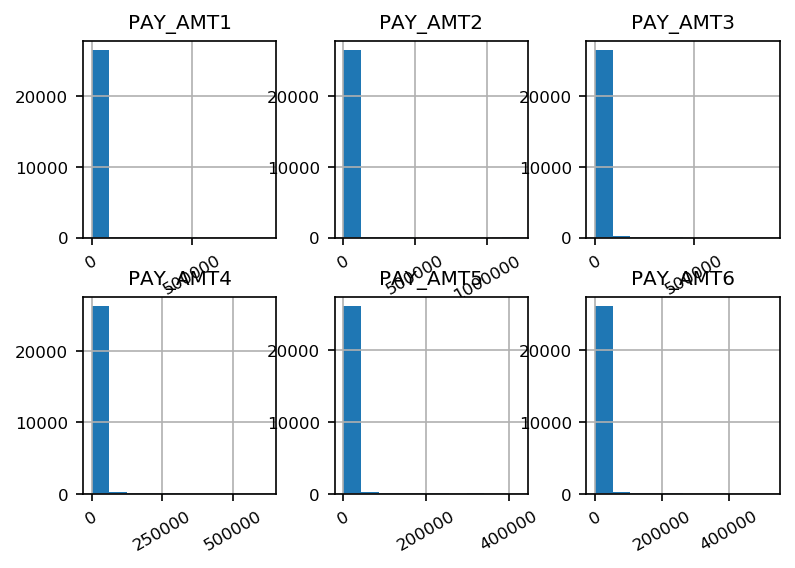

In [182]:
df[pay_amt_feats].hist(layout=(2,3), xrot=30)

Use a Boolean mask to see how many of the payment amount data are exactly equal to 0. Does this make sense given the histogram in the previous step

In [183]:
pay_zero_mask = df[pay_amt_feats] == 0
pay_zero_mask.head()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,True,False,True,True,True,True
1,True,False,False,False,True,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


Ignoring the payments of 0 using the mask you created in the previous step, use pandas .apply() and NumPy's np.log10() to plot histograms of logarithmic transformations of the non-zero payments. Consider the results.

In [184]:
pay_zero_mask.sum()

PAY_AMT1    4656
PAY_AMT2    4833
PAY_AMT3    5293
PAY_AMT4    5697
PAY_AMT5    5981
PAY_AMT6    6373
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5feb1f5950>,
      dtype=object)

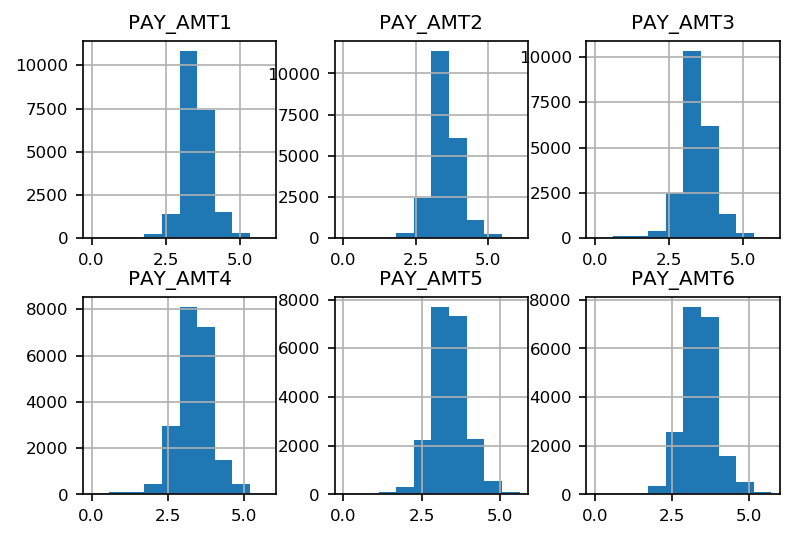

In [193]:
df[pay_amt_feats][~pay_zero_mask].apply(np.log10).hist(layout=(2,3))